<a href="https://colab.research.google.com/github/Aditya828-ctrl/Temporary_add_to_version_control/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DeepLearningProjects/ImageClassification

/content/drive/MyDrive/DeepLearningProjects/ImageClassification


In [4]:

from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile

dataset_folder_path = 'cifar-10-batches-py'

class DownloadProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isdir(dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

In [5]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def loadBatch(dataset_folder_path, batch_id):
  filename=dataset_folder_path+ "/data_batch_"+str(batch_id)
  with open(filename, mode='rb') as file:
    batch = pkl.load(file, encoding='latin1')
        
  data = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1) 
  labels = batch['labels']
        
  return data, labels

In [7]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Exploring the dataset:-->**

In [8]:

def display_stats(dataset_folder_path, batch_id, sample_id):
    data, labels = loadBatch(dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(data)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(data), batch_id, sample_id))
        return None

    print('\nStats of batch no.{}:'.format(batch_id))
    print('Number of Samples: {}\n'.format(len(data)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key], value))
    
    sample_image = data[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch no.5:
Number of Samples: 10000

Label Counts of [0](airplane) : 1014
Label Counts of [1](automobile) : 1014
Label Counts of [2](bird) : 952
Label Counts of [3](cat) : 1016
Label Counts of [4](deer) : 997
Label Counts of [5](dog) : 1025
Label Counts of [6](frog) : 980
Label Counts of [7](horse) : 977
Label Counts of [8](ship) : 1003
Label Counts of [9](truck) : 1022

Example of Image 1:
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


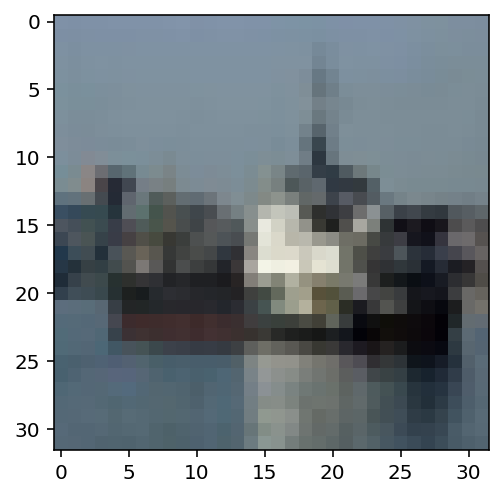

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

batch_id = 5
sample_id = 1
display_stats(dataset_folder_path, batch_id, sample_id)

In [10]:
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    x = (x-min) / (max-min)
    return x

In [11]:

def one_hot_encode(labelList):
    encoded = np.zeros((len(labelList), 10))
    
    for idx, val in enumerate(labelList):
        encoded[idx][val] = 1
    
    return encoded

In [12]:
def _preprocess_and_save(normalize, one_hot_encode, data, labels, filename):
    data = normalize(data)
    labels = one_hot_encode(labels)

    pkl.dump((data, labels), open(filename, 'wb'))


def preprocess_and_save_data(dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_data = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        data, labels = loadBatch(dataset_folder_path, batch_i)
        
        validationIndex = int(len(data) * 0.1)  #10% validation set

        _preprocess_and_save(normalize, one_hot_encode,
                             data[:-validationIndex], labels[:-validationIndex], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        valid_data.extend(data[-validationIndex:])
        valid_labels.extend(labels[-validationIndex:])

    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_data), np.array(valid_labels),
                         'preprocess_validation.p')

    with open(dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pkl.load(file, encoding='latin1')

    test_data = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']
    
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_data), np.array(test_labels),
                         'preprocess_training.p')


In [13]:

preprocess_and_save_data(dataset_folder_path, normalize, one_hot_encode)

In [14]:
import pickle

valid_data, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

Preprocessing complete:

In [15]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.3MB 94kB/s 
     |████████████████████████████████| 3.2MB 37.2MB/s 
     |████████████████████████████████| 491kB 37.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [16]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [17]:
#tf.compat.v1.disable_eager_execution()

In [18]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x')
y =  tf.placeholder(tf.float32, shape=(None, 10), name='output_y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [19]:
#pip install tf-slim

In [20]:
import tensorflow as tf

def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out

In [21]:
epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [22]:
pip install --user gast==0.2.2

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=d5e41db2b98f9836adbb46f58b65b365e7f199e92633e471b9b4e78106d77868
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [23]:

logits = conv_net(x, keep_prob)
model = tf.identity(logits, name='logits') # Name logits Tensor, so that can be loaded from disk after training

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [24]:
def train_neural_network(session, optimizer, keep_probability, data_batch, label_batch):
    session.run(optimizer, 
                feed_dict={
                    x: data_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })

In [25]:
def print_stats(session, data_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: data_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_data,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [26]:
def batch_data_labels(data, labels, batch_size):

    for start in range(0, len(data), batch_size):
        end = min(start + batch_size, len(data))
        yield data[start:end], labels[start:end]

def load_preprocess_training_batch(batch_id, batch_size):
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    data, labels = pkl.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_data_labels(data, labels, batch_size)

In [ ]:
save_model_path = './image_classification'

print('Training...')
with tf.compat.v1.Session() as sess:
    # Initializing the variables
    sess.run(tf.compat.v1.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_data, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_data, batch_labels)
                
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_data, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.1574 Validation Accuracy: 0.257600
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.8516 Validation Accuracy: 0.266200
Epoch  1, CIFAR-10 Batch 3:  Loss:     1.6273 Validation Accuracy: 0.305200
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.6868 Validation Accuracy: 0.365400


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

def batch_features_labels(data, labels, batch_size):

    for start in range(0, len(data), batch_size):
        end = min(start + batch_size, len(data))
        yield data[start:end], labels[start:end]

def display_image_predictions(data, labels, predictions, top_n_predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=top_n_predictions, ncols=2, figsize=(20, 10))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions
   
    for image_i, (dat, label_id, pred_indicies, pred_values) in enumerate(zip(data, label_ids, predictions.indices, predictions.values)):
        if (image_i < top_n_predictions):
            pred_names = [label_names[pred_i] for pred_i in pred_indicies]
            correct_name = label_names[label_id]
            
            axies[image_i][0].imshow((dat*255).astype(np.int32, copy=False))
            axies[image_i][0].set_title(correct_name)
            axies[image_i][0].set_axis_off()

            axies[image_i][1].barh(ind + margin, pred_values[:3], width)
            axies[image_i][1].set_yticks(ind + margin)
            axies[image_i][1].set_yticklabels(pred_names[::-1])
            axies[image_i][1].set_xticks([0, 0.5, 1.0])

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import random

save_model_path = './image_classification'
batch_size = 64
n_samples = 10
top_n_predictions = 5

def test_model():
    test_data, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_x:0')
        loaded_y = loaded_graph.get_tensor_by_name('output_y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_dat_batch, train_label_batch in batch_features_labels(test_data, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_dat_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_data, random_test_labels = tuple(zip(*random.sample(list(zip(test_data, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_data, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_data, random_test_labels, random_test_predictions, top_n_predictions)


test_model()
